In [1]:
# Import necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

C:\Users\austinsh\AppData\Local\Temp\ipykernel_28044\3619633928.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# url_df_All_1 = 'https://github.com/saust1/Project-OptiC4/blob/e358d5172ac0b8fbb6fba776c0fe0a2b523b8b5c/3%20Feature%20Selection/contData_all_Avg%20-%201o2.csv?raw=true'
# url_df_All_2 = 'https://github.com/saust1/Project-OptiC4/blob/e358d5172ac0b8fbb6fba776c0fe0a2b523b8b5c/3%20Feature%20Selection/contData_all_Avg%20-%202o2.csv?raw=true'

# df_All_1 = pd.read_csv(url_df_All_1, index_col=0)
# df_All_2 = pd.read_csv(url_df_All_2, index_col=0)

In [3]:
# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

# print(df_All.head())

In [4]:
df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())

                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol  ...    LC90366  \
0            0.867508    0.670721     3.354160  30.3662  ...  15.449150   
1            0.864729    0.671059     3.306475  30.3662  ...  15.449150   
2            0.856391    0.672071     3.163420  30.6785  ...  15.449150   
3            0.811652    0.674174     2.238130  32.6454  ...   8.759814   
4            0.773793    0.675408     1.391475  32.6454  ...   8.759814   

    LC90368   PI55004   PI55020   TC55552   TC55553   TC55555 

In [5]:
df_All.columns

Index(['Date', '425_pct_Al', 'Al2O3', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'DI55102',
       'DI55152', 'DI55580', 'FC55003', 'FC55552', 'FC55569', 'FC55576',
       'FFC55553', 'FFC55555', 'LC52572', 'LC55553', 'LC55557', 'LC55568',
       'LC90366', 'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553',
       'TC55555', 'TI40050', 'TI55021', 'TI55023'],
      dtype='object')

In [6]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [7]:
# # List of columns to exclude to run XGboost feature selection
# exclude_columns = ['Octanol', 'Hexanol', 'Ethanol', 'Decanol',
       
#        'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55021', 'TI55023',
#        'TC52015', 'FC52018', 'II52554', 'TI40050', 'VI52558B'
#                    ]

# # Create a new DataFrame without the excluded columnsd
# df_All = df_All.drop(columns=exclude_columns)

In [8]:
# df_All = df_All[df_All['Date'] > '2022-06-15 00:00:00']

# Remaining Features after Correlation Analysis

In [9]:

# selected_columns = ['425 %Al', 'Butanol', 'DI55102', 'DI55152', 'DI55580', 'FC42428',
#        'FC55003', 'FC55552', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555',
#        'LC52572', 'LC55553', 'LC55555', 'LC55557', 'LC55568', 'LC90366',
#        'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553', 'TC55555'
#                    ]

# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

In [10]:
# First Iteration
# selected_columns = ['Butanol PPM', '425 SAO Al', 'FC42428', 'FC55003', 'FC55102', 'FC55152', 'FFC55555',
#        'LC55553', 'LC55557', 'LC55568', 'LC90366', 'TC55555']




In [11]:
df_All.columns

Index(['Date', '425_pct_Al', 'Al2O3', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'DI55102',
       'DI55152', 'DI55580', 'FC55003', 'FC55552', 'FC55569', 'FC55576',
       'FFC55553', 'FFC55555', 'LC52572', 'LC55553', 'LC55557', 'LC55568',
       'LC90366', 'LC90368', 'PI55004', 'PI55020', 'TC55552', 'TC55553',
       'TC55555', 'TI40050', 'TI55021', 'TI55023'],
      dtype='object')

In [12]:
# Splitting into train and test
X = df_All.drop(['Butanol', 'Date'], axis=1)  # Assuming 'target' is your target column
y = df_All['Butanol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# # Ensure all columns are numeric and handle missing values
# # For example, to fill missing values with the mean of each column:
# X = X.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(X.mean())
# y = pd.to_numeric(y, errors='coerce').fillna(y.mean())

# Adding a constant to the model (if you haven't already)
X = sm.add_constant(X)

# Now, split your dataset into train and test again to ensure clean separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#=============================================
# TRAIN & EVALUATE REGRESSION MODEL
#=============================================

#fit simple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Butanol   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     413.0
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:56:01   Log-Likelihood:            -1.3877e+05
No. Observations:               40127   AIC:                         2.776e+05
Df Residuals:                   40095   BIC:                         2.779e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -63.2112     14

In [15]:
# Convert summary to DataFrame
summary_table = model.summary().tables[1]
summary_df = pd.DataFrame(summary_table.data[1:], columns=summary_table.data[0])

# Convert necessary columns to numeric
numeric_cols = ['coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']
summary_df[numeric_cols] = summary_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply the filter for insignificance and CI crossing zero
threshold = 0.05
filtered_df = summary_df[(summary_df['P>|t|'] > threshold) & ((summary_df['[0.025'] < 0) & (summary_df['0.975]'] > 0))]

# Extracting the feature names
insignificant_features = filtered_df.iloc[:, 0].tolist()  # First column contains feature names
print(insignificant_features)


['M_Value', 'PI55004', 'TI55023']


In [16]:
print(filtered_df)

               coef  std err      t  P>|t|  [0.025  0.975]
3   M_Value -0.4727    0.249 -1.899  0.058  -0.961   0.015
24  PI55004  0.0438    0.186  0.235  0.814  -0.321   0.409
31  TI55023 -0.0408    0.060 -0.679  0.497  -0.159   0.077


In [17]:
# Filter for significant features
significant_df = summary_df[(summary_df['P>|t|'] <= threshold) & ((summary_df['[0.025'] > 0) | (summary_df['0.975]'] < 0))]
significant_features = significant_df.iloc[:, 0].tolist()
print("\nSignificant Features:")
print(significant_features)


Significant Features:
['const', '425_pct_Al', 'Al2O3', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'DI55102', 'DI55152', 'DI55580', 'FC55003', 'FC55569', 'FC55576', 'FFC55553', 'FFC55555', 'LC52572', 'LC55553', 'LC55557', 'LC55568', 'LC90366', 'LC90368', 'PI55020', 'TC55552', 'TC55553', 'TC55555', 'TI40050', 'TI55021']


ValueError: x and y must be the same size

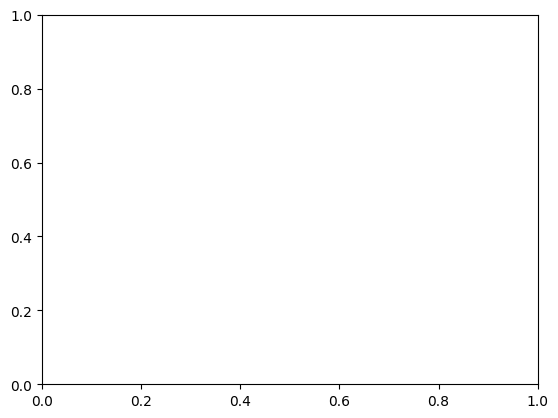

In [18]:
import matplotlib.pyplot as plt
# Adding a constant to the model (for the intercept)
X_sm = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X_sm).fit()

# Make predictions
predictions = model.predict(X_sm)

# Plotting
plt.scatter(X, y, alpha=0.5)  # Scatter plot of the data
plt.plot(X, predictions, color='red')  # Regression line
plt.title('Scatter plot with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.show()